In [1]:
!pwd

'pwd' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [3]:
import datetime
print(datetime.datetime.now())


2022-12-15 12:07:20.941956


In [16]:
!python3 -m pip install protobuf==3.4.0 tensorflow==1.5.0 joblib numpy sklearn pandas matplotlib seaborn

In [11]:
!pip3 install joblib numpy sklearn pandas matplotlib seaborn

In [17]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
from tensorflow.python.keras import backend as K
print(K._get_available_gpus())

ModuleNotFoundError: No module named 'tensorflow'

In [15]:
!which pip3

/Library/Frameworks/Python.framework/Versions/3.6/bin/pip3


In [5]:
import joblib

import tensorflow as tf
import numpy as np
import datetime
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from sklearn.preprocessing import LabelEncoder
scale_col = "x_gaze_location_standard_scaled"

def apply_phq_cutoff(df , neg_phq_cutoff, pos_phq_cutoff):
    df["phq_binary_label"] = [0.0 if x <= neg_phq_cutoff else 1.0 if x >= pos_phq_cutoff else "other" for x in df.phq_score]
    df = df[df.phq_binary_label!= 'other']
    return df


def get_timecols_df_for_DL(fn ="/Users/orenkobo/Desktop/PhD_new/repos/HebLingStudy/notebooks/df.csv",
                           scale_col = scale_col):

    import string, re
    print(f"{datetime.datetime.now()} Reading csv from {fn}")
    df = pd.read_csv(fn,
                     index_col=None,
                     converters={#'alephbert_enc': eval,
                         scale_col : eval,
                         # 'x_gaze_location_minmax_scaled' : eval,
                         # 'x_gaze_location_standard_scaled' : eval,
                         # 'target_word_x_range' : eval
                         # 'phq_label': bool
                     })
    print(df.shape)


    df = df[df.Sentence_type != 'F'].reset_index(drop=True)


    id_cols = ["phq_score","phq_group","Subject", "Sentence_type",
               "sentence_pupil_diameter_mean","set_num"]
    # vec_size = 3500
    # new_colname = f"x_gaze_location_{vec_size}"
    cols = [f"timepoint#{i}" for i in range(875)]
    # df[new_colname] = df["x_gaze_location_standard_scaled"].apply(lambda x : x[:vec_size])
    timeseries_df = pd.DataFrame(data = df[scale_col].to_list() , columns = cols)
    timeseries_df[id_cols] = df[id_cols]
    timeseries_df = timeseries_df.iloc[:,200:]
    cols = [x for x in timeseries_df.columns if "timepoint" in x]
    return timeseries_df, cols

In [6]:
import pandas as pd
d = {}
df_fn = "/export/home/orenkobo/Aim1/paper_analysis/Artifacts/df_new_full__unsegmented_alldata_new_FINAL_paparanalysis.csv"
# df_fn = "/Users/orenkobo/Desktop/PhD/HebLingStudy/ts_data/Artifacts2/df_new_full__unsegmented_alldata_new_FINAL.csv"
# et_scale_col = "x_gaze_location_rescaled"
et_scale_col = "x_gaze_location_standard_scaled"
override_cutoff = [7,8]
df, timepoint_cols = get_timecols_df_for_DL(fn =df_fn, scale_col = scale_col)
df = apply_phq_cutoff(df,
                      neg_phq_cutoff = override_cutoff[0],
                      pos_phq_cutoff = override_cutoff[1])


cond_df = pd.get_dummies(df['Sentence_type'])
cond_cols = cond_df.columns.tolist()
df = pd.concat([df, cond_df],axis=1)
df = df.reset_index(drop=True)
df['encoded_cond'] = LabelEncoder().fit_transform(df['Sentence_type'])

df

2022-07-10 09:21:12.751801 Reading csv from /export/home/orenkobo/Aim1/paper_analysis/Artifacts/df_new_full__unsegmented_alldata_new_FINAL_paparanalysis.csv
(9696, 32)


,timepoint#200,timepoint#201,timepoint#202,timepoint#203,timepoint#204,timepoint#205,timepoint#206,timepoint#207,timepoint#208,timepoint#209,...,Subject,Sentence_type,sentence_pupil_diameter_mean,set_num,phq_binary_label,A,B,C,D,encoded_cond
0,1.248853,1.242846,1.250856,1.257864,1.246851,1.239843,1.238841,1.250856,1.242846,1.239843,...,3,A,5110.630668,17,0.0,1,0,0,0,0
1,-0.605603,-0.604602,-0.602600,-0.590588,-1.061065,-1.648661,-1.700713,-1.695708,-1.703717,-1.710724,...,3,B,4974.146741,5,0.0,0,1,0,0,1
2,0.127316,0.133326,0.121306,0.099268,0.104277,0.115296,0.122307,0.124311,0.135330,0.161374,...,3,D,4739.278462,12,0.0,0,0,0,1,3
3,-1.144312,-1.155340,-1.149325,-1.117245,-1.106217,-1.129275,-1.135290,-1.111230,-1.109224,-1.127270,...,3,A,4775.260020,6,0.0,1,0,0,0,0
4,-1.554332,-1.571359,-1.577369,-1.608418,-1.600405,-1.571359,-1.558338,-1.560341,-1.565349,-1.573362,...,3,B,4746.720839,26,0.0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3227,-1.686416,-1.706449,-1.697434,-2.352531,-2.500779,-2.447690,-2.421646,-2.419643,-2.425653,-2.450695,...,139,D,5117.994088,0,1.0,0,0,0,1,3
3228,0.985337,0.997349,0.986338,0.976329,0.983335,0.991343,0.990342,0.994346,0.975328,0.977330,...,139,D,4995.187626,15,1.0,0,0,0,1,3
3229,1.002969,1.014985,0.504330,0.345126,0.339118,0.340120,0.351134,0.363149,0.364150,0.377167,...,139,A,4934.199434,27,1.0,1,0,0,0,0
3230,1.745621,1.753631,1.758638,1.737610,1.736609,1.735608,1.736609,1.741616,1.322060,1.367120,...,139,C,5056.427875,4,1.0,0,0,1,0,2


In [7]:
print(df[timepoint_cols].shape)
print(df[timepoint_cols].dropna().shape)
df[timepoint_cols] = df[timepoint_cols].ffill()
print(df[timepoint_cols].shape)

(3232, 675)
(1427, 675)
(3232, 675)


In [8]:
def generate_3d_ds(df, feats = timepoint_cols):
    data_3d = []

    labels = []
    # print(f"{datetime.datetime.now()} - DS generated Start")
    for idx , row in df.iterrows():
        # if (idx % 500) == 0:
        #     print(idx)
        l = []
        for col in feats:
            l.append([row[col]] + [row['encoded_cond']])
        data_3d.append(l)
        labels.append(row["phq_binary_label"])
    X_input = np.asarray(data_3d)
    X_input_reshaped = np.swapaxes(X_input,1,2)
    # print(f"{datetime.datetime.now()} - DS generated Done")

    return X_input_reshaped, labels


In [9]:
def calc_per_subj_pred(pred, n=32):
    if type(pred) != list:
        pred = [x[0] for x in pred]
    c = [pred[i * n:(i + 1) * n] for i in range((len(pred) + n - 1) // n )]
    l = pd.DataFrame(c).mean(axis=1)
    return l

In [25]:
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=16, restore_best_weights=True)]

def train_fold(X_train, y_train, X_val, y_val, voc_size=4, nepochs=20):

    inp1 = layers.Input(shape=(1, 675))  # TensorShape([None, 2, 100])
    inp2 = layers.Input(shape=(1, 675))  # TensorShape([None, 1, 100])
    x2 = layers.Embedding(input_dim=voc_size, output_dim=8)(inp2)  # TensorShape([None, 1, 100, 8])
    x2_reshaped = tf.transpose(tf.squeeze(x2, axis=1), [0, 2, 1])  # TensorShape([None, 8, 100])
    x = layers.concatenate([inp1, x2_reshaped], axis=1)
    x = layers.LSTM(32, activation='tanh',
                    # kernel_regularizer=tf.keras.regularizers.l1(0.001),
                    activity_regularizer=tf.keras.regularizers.l1(0.01)
                    )(x)
    x = layers.Dropout(0.1)(x)
    x = layers.Dense(8, activation='tanh',
                    kernel_regularizer=tf.keras.regularizers.l2(0.01),
                    activity_regularizer=tf.keras.regularizers.l2(0.01)
                    )(x)
    x = layers.Dropout(0.1)(x)
    x = layers.Dense(1, activation='sigmoid')(x)
    model = Model(inputs=[inp1, inp2], outputs=[x])

    # print("A1 : ", datetime.datetime.now())
    opt = tf.keras.optimizers.Adam(learning_rate=0.1)

    model.compile(
        loss='binary_crossentropy',
        optimizer=opt,
        metrics=['acc']
    )

    train_inp_gaze = X_train[:, :1, :]
    train_inp_cond = X_train[:, 1:, :]
    val_inp_gaze = X_val[:, :1, :]
    val_inp_cond = X_val[:, 1:, :]



    his = model.fit(epochs=nepochs, verbose=0,
              x=[train_inp_gaze, train_inp_cond], y=np.array(y_train).astype('float'),
              validation_data = ([val_inp_gaze, val_inp_cond], np.array(y_val).astype('float')),
                    callbacks = callbacks)
    return model


In [26]:
df["Is_congruent"] = [True if x in ['A','C'] else False for x in df["Sentence_type"]]
df["Is_pos"] = [True if x in ['A','B'] else False for x in df["Sentence_type"]]

In [ ]:
import numpy as np
from sklearn.model_selection import LeavePGroupsOut, GroupShuffleSplit
import random

def train_loop(df, nepochs, niters, ntests, shuffles):
    from numpy.random import seed
    seed(1)
    tf.random.set_seed(3)
    # from tensorflow.keras.utils import set_random_seed
    # set_random_seed(2)
    c = 0
    # num_iters = 2
    groups1 = df['Subject']
    # lpgo1 = LeavePGroupsOut(n_groups=10)
    res_dict = {}
    i = 0
    d = []
    total = len(shuffles) * len(nepochs) * len(niters) * len(ntests)
    for target in ["Is_congruent", "Is_pos"]:
        for to_shuffle in shuffles:
            for ne in nepochs:
                # if 1==1:
                for num_iters in niters:#,200]:#310,15,20,25,30,50,100]:
                    for n_test_subjs in ntests:#,10,15,20]:# [4,8,12,15,20]:

                        c+=1
                        lpgo1 = GroupShuffleSplit(n_splits=num_iters, test_size=n_test_subjs, random_state = 7)
                        print(f"{datetime.datetime.now()} : Start - c = {c}/{total} (epochs, iters, n_tests, shuffled) = {ne, num_iters, n_test_subjs, to_shuffle}")
                        i = 0
                        for tmp_index, test_index in lpgo1.split(X = df[timepoint_cols] , y = df[target], groups = groups1):
                            if i % 50 == 0:
                                print(f"{datetime.datetime.now()}: Iter {i} (c={c})")
                            if i==num_iters:
                                break
                            res_dict[i] = {}
                            # lpgo2 = LeavePGroupsOut(n_groups=10)
                            lpgo2 = GroupShuffleSplit(n_splits=num_iters, test_size=n_test_subjs, random_state = 7)
                            test_subjects = list(np.unique(groups1.iloc[test_index]))
                            test_df = df.iloc[test_index]
                            tmp_df = df.iloc[tmp_index]
                            groups2 = tmp_df['Subject']
                            for train_index, val_index in lpgo2.split(X = tmp_df[timepoint_cols] ,
                                                                      y = tmp_df[target],
                                                                      groups = groups2):

                                train_df = tmp_df.iloc[train_index]
                                val_df = tmp_df.iloc[val_index]
                                break
                            X_train, y_train = generate_3d_ds(train_df)
                            X_test, y_test = generate_3d_ds(test_df)
                            X_val, y_val = generate_3d_ds(val_df)

                            if to_shuffle:
                                y_train = random.sample(y_train, len(y_train))
                                y_test = random.sample(y_test, len(y_test))
                                y_val = random.sample(y_val, len(y_val))

                            fold_model = train_fold(X_train, y_train, X_val, y_val , nepochs=ne)
                            fold_eval = fold_model.evaluate([X_test[:, :1, :], X_test[:, 1:, :]], np.array(y_test).astype('float'))
                            fold_test_pred = fold_model.predict([X_test[:, :1, :], X_test[:, 1:, :]])

                            res_dict[i]["eval"] = fold_eval[1]
                            res_dict[i]["test_subjects"] = test_subjects
                            res_dict[i]["test_pred"] = [x[0] for x in fold_test_pred]

                            i+=1

                        conf_acc_1 = np.mean([res_dict[x]['eval'] for x in range(num_iters)])
                        print(f"{datetime.datetime.now()} - c = {c} , accs are {conf_acc_1}")

                        d.append([target, num_iters, ne, n_test_subjs, conf_acc_1, to_shuffle])
    print(f"{datetime.datetime.now()} Done")
    print(d)
    df = pd.DataFrame(d , columns=["num_iters","num_epochs","num_test_subjs","eval", "is_shuffled_iter"])
    print(df)
    return df

print(datetime.datetime.now())
train_loop(df, nepochs = [20, 30], ntests = [10], niters = [20], shuffles = [False, True])
print(datetime.datetime.now())


2022-07-10 12:05:49.377008
2022-07-10 12:05:49.395406 : Start - c = 1/4 (epochs, iters, n_tests, shuffled) = (20, 20, 10, False)
2022-07-10 12:05:49.410940: Iter 0 (c=1)
10/10 [==============================] - 0s 4ms/step - loss: 0.8116 - acc: 0.4000
2022-07-10 12:16:00.857047 - c = 1 , accs are 0.49140625447034836
2022-07-10 12:16:00.857233 : Start - c = 2/4 (epochs, iters, n_tests, shuffled) = (30, 20, 10, False)
2022-07-10 12:16:00.870082: Iter 0 (c=2)
10/10 [==============================] - 0s 4ms/step - loss: 0.7205 - acc: 0.8000


In [12]:
res_df = df.copy()
res_df

ERROR! Session/line number was not unique in

,timepoint#200,timepoint#201,timepoint#202,timepoint#203,timepoint#204,timepoint#205,timepoint#206,timepoint#207,timepoint#208,timepoint#209,...,sentence_pupil_diameter_mean,set_num,phq_binary_label,A,B,C,D,encoded_cond,Is_congruent,Is_pos
0,1.248853,1.242846,1.250856,1.257864,1.246851,1.239843,1.238841,1.250856,1.242846,1.239843,...,5110.630668,17,0.0,1,0,0,0,0,True,True
1,-0.605603,-0.604602,-0.602600,-0.590588,-1.061065,-1.648661,-1.700713,-1.695708,-1.703717,-1.710724,...,4974.146741,5,0.0,0,1,0,0,1,False,True
2,0.127316,0.133326,0.121306,0.099268,0.104277,0.115296,0.122307,0.124311,0.135330,0.161374,...,4739.278462,12,0.0,0,0,0,1,3,False,False
3,-1.144312,-1.155340,-1.149325,-1.117245,-1.106217,-1.129275,-1.135290,-1.111230,-1.109224,-1.127270,...,4775.260020,6,0.0,1,0,0,0,0,True,True
4,-1.554332,-1.571359,-1.577369,-1.608418,-1.600405,-1.571359,-1.558338,-1.560341,-1.565349,-1.573362,...,4746.720839,26,0.0,0,1,0,0,1,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3227,-1.686416,-1.706449,-1.697434,-2.352531,-2.500779,-2.447690,-2.421646,-2.419643,-2.425653,-2.450695,...,5117.994088,0,1.0,0,0,0,1,3,False,False
3228,0.985337,0.997349,0.986338,0.976329,0.983335,0.991343,0.990342,0.994346,0.975328,0.977330,...,4995.187626,15,1.0,0,0,0,1,3,False,False
3229,1.002969,1.014985,0.504330,0.345126,0.339118,0.340120,0.351134,0.363149,0.364150,0.377167,...,4934.199434,27,1.0,1,0,0,0,0,True,True
3230,1.745621,1.753631,1.758638,1.737610,1.736609,1.735608,1.736609,1.741616,1.322060,1.367120,...,5056.427875,4,1.0,0,0,1,0,2,True,False


 database. History logging moved to new session 105


In [49]:
res_df = pd.DataFrame(d , columns=["num_iters","num_epochs","num_test_subjs","eval","subj_acc"])
res_df

,num_iters,num_epochs,num_test_subjs,eval,subj_acc
0,50,10,1,0.480625,0.380
1,50,10,5,0.453625,0.392
2,100,10,1,0.462500,0.420
3,100,10,5,0.471750,0.416
4,50,15,1,0.422500,0.320
5,50,15,5,0.477125,0.408
6,100,15,1,0.485000,0.510
7,100,15,5,0.480125,0.434
8,50,20,1,0.438125,0.380
9,50,20,5,0.446625,0.436


In [55]:
res_df[(res_df.num_epochs == 15) & (res_df.num_test_subjs == 5) ]

,num_iters,num_epochs,num_test_subjs,eval,subj_acc
5,50,15,5,0.477125,0.408
7,100,15,5,0.480125,0.434


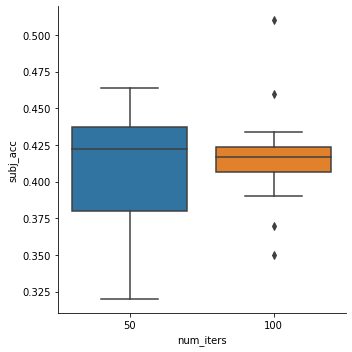

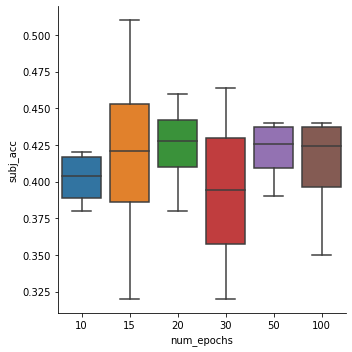

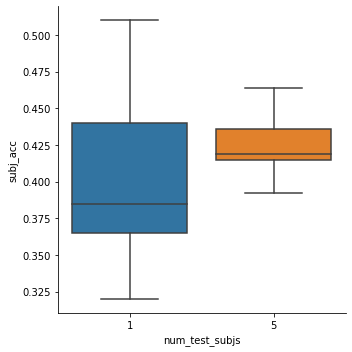

In [54]:
import seaborn as sns
import  matplotlib.pyplot as plt
sns.catplot(data = res_df, x = 'num_iters', y='subj_acc', kind='box')
plt.show()

sns.catplot(data = res_df, x = 'num_epochs', y='subj_acc', kind='box')
plt.show()

sns.catplot(data = res_df, x = 'num_test_subjs', y='subj_acc', kind='box')
plt.show()

In [38]:
d

[[100, 1, 0.481875, 0.43],
 [100, 5, 0.481875, 0.43],
 [100, 10, 0.481875, 0.43],
 [100, 15, 0.481875, 0.43],
 [100, 20, 0.481875, 0.43],
 [100, 1, 0.481875, 0.43],
 [100, 5, 0.481875, 0.43],
 [100, 10, 0.481875, 0.43],
 [100, 15, 0.481875, 0.43],
 [100, 20, 0.481875, 0.43],
 [100, 1, 0.481875, 0.43],
 [100, 5, 0.481875, 0.43],
 [100, 10, 0.481875, 0.43],
 [100, 15, 0.481875, 0.43],
 [100, 20, 0.481875, 0.43],
 [100, 1, 0.481875, 0.43],
 [100, 5, 0.481875, 0.43],
 [100, 10, 0.481875, 0.43],
 [100, 15, 0.481875, 0.43],
 [100, 20, 0.481875, 0.43],
 [100, 1, 0.481875, 0.43],
 [100, 5, 0.481875, 0.43],
 [100, 10, 0.481875, 0.43],
 [100, 15, 0.481875, 0.43],
 [100, 20, 0.481875, 0.43],
 [100, 1, 0.481875, 0.43],
 [100, 5, 0.481875, 0.43],
 [100, 10, 0.481875, 0.43],
 [100, 15, 0.481875, 0.43],
 [100, 20, 0.481875, 0.43]]

In [21]:
print(f"{n_test_subjs} subjects : ")
print(np.mean([res_dict[i]['eval'] for i in range(num_iters)]))
print(np.mean([res_dict[i]['subj_level_acc'] for i in range(num_iters)]))

8 subjects : 
0.44244791666666666
0.4166666666666667


In [14]:
print(f"{n_test_subjs} subjects : ")
print(np.mean([res_dict[i]['eval'] for i in range(num_iters)]))
print(np.mean([res_dict[i]['subj_level_acc'] for i in range(num_iters)]))

15 subjects : 
0.44736111362775166
0.4444444444444444


In [15]:
print(f"{n_test_subjs} subjects : ")
print(np.mean([res_dict[i]['eval'] for i in range(num_iters)]))
print(np.mean([res_dict[i]['subj_level_acc'] for i in range(num_iters)]))

15 subjects : 
0.44736111362775166
0.4444444444444444


In [16]:
print(np.mean([res_dict[i]['eval'] for i in range(num_iters)]))
print(np.mean([res_dict[i]['subj_level_acc'] for i in range(num_iters)]))

0.44736111362775166
0.4444444444444444


In [17]:
accs = [res_dict[i]['subj_level_acc'] for i in range(num_iters)]
np.mean(accs)

0.4444444444444444

<AxesSubplot:>

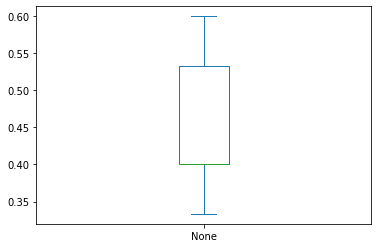

In [18]:
pd.Series(accs).plot.box()

In [19]:
my_list = res_dict[0]["test_pred"]
n=32
c = [my_list[i * n:(i + 1) * n] for i in range((len(my_list) + n - 1) // n )]
# pd.DataFrame(c).mean(axis=1)
c

[[0.5070113,
  0.16465992,
  0.48122215,
  0.4486994,
  0.39266095,
  0.45569283,
  0.453677,
  0.51846486,
  0.4452508,
  0.39522156,
  0.39622372,
  0.31888562,
  0.51943463,
  0.4699189,
  0.5236134,
  0.3891532,
  0.46924448,
  0.4759156,
  0.4244978,
  0.46768498,
  0.3690222,
  0.52378327,
  0.29376075,
  0.48122215,
  0.44827297,
  0.45631793,
  0.44238904,
  0.39716274,
  0.50464594,
  0.50514555,
  0.4544356,
  0.39651972],
 [0.29022944,
  0.4834538,
  0.45982715,
  0.41394088,
  0.3710991,
  0.3714983,
  0.42909554,
  0.44294304,
  0.43772668,
  0.43834448,
  0.38749528,
  0.39391112,
  0.42815793,
  0.25977758,
  0.45978463,
  0.34069023,
  0.3845086,
  0.43672225,
  0.3992129,
  0.4446404,
  0.45459804,
  0.38521647,
  0.4246188,
  0.3567533,
  0.40212372,
  0.4191378,
  0.3984646,
  0.4484913,
  0.454309,
  0.32566705,
  0.40597767,
  0.46851805],
 [0.2826801,
  0.30107045,
  0.403914,
  0.35224962,
  0.41288137,
  0.46687198,
  0.2266157,
  0.3381206,
  0.35454595,
  0.33

In [ ]:
res_dict[0]

In [ ]:
d = res_dict[0]
d
# [my_list[i * n:(i + 1) * n] for i in range((len(my_list) + n - 1) // n )]

In [ ]:
res_dict[0]